<a href="https://colab.research.google.com/github/danielrve/jupyternotebook/blob/main/Enterprise_Architecture_DevOps_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install graphviz


In [ ]:
pip install diagrams

In [10]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2, ECS
from diagrams.aws.database import RDS, ElastiCache
from diagrams.aws.network import ELB, Route53

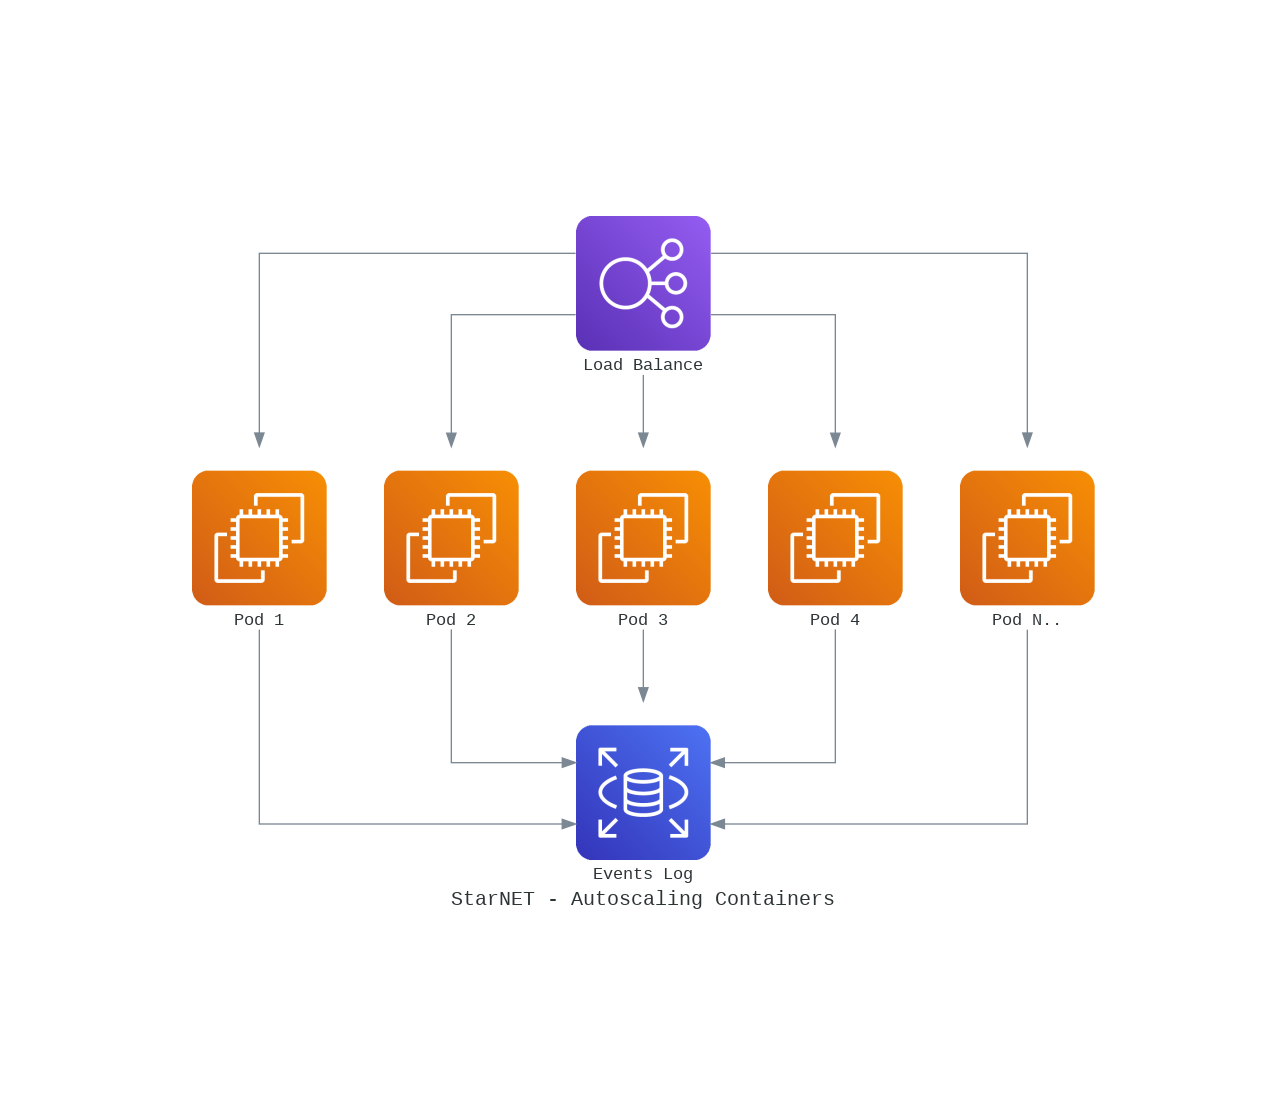

In [6]:
with Diagram("StarNET - Autoscaling Containers",
             show=True,
             direction="TB") as Diag:
    ELB("Load Balance") >> [EC2("Pod 1"),
                  EC2("Pod 2"),
                  EC2("Pod 3"),
                  EC2("Pod 4"),
                  EC2("Pod N..")] >> RDS("Events Log")
Diag

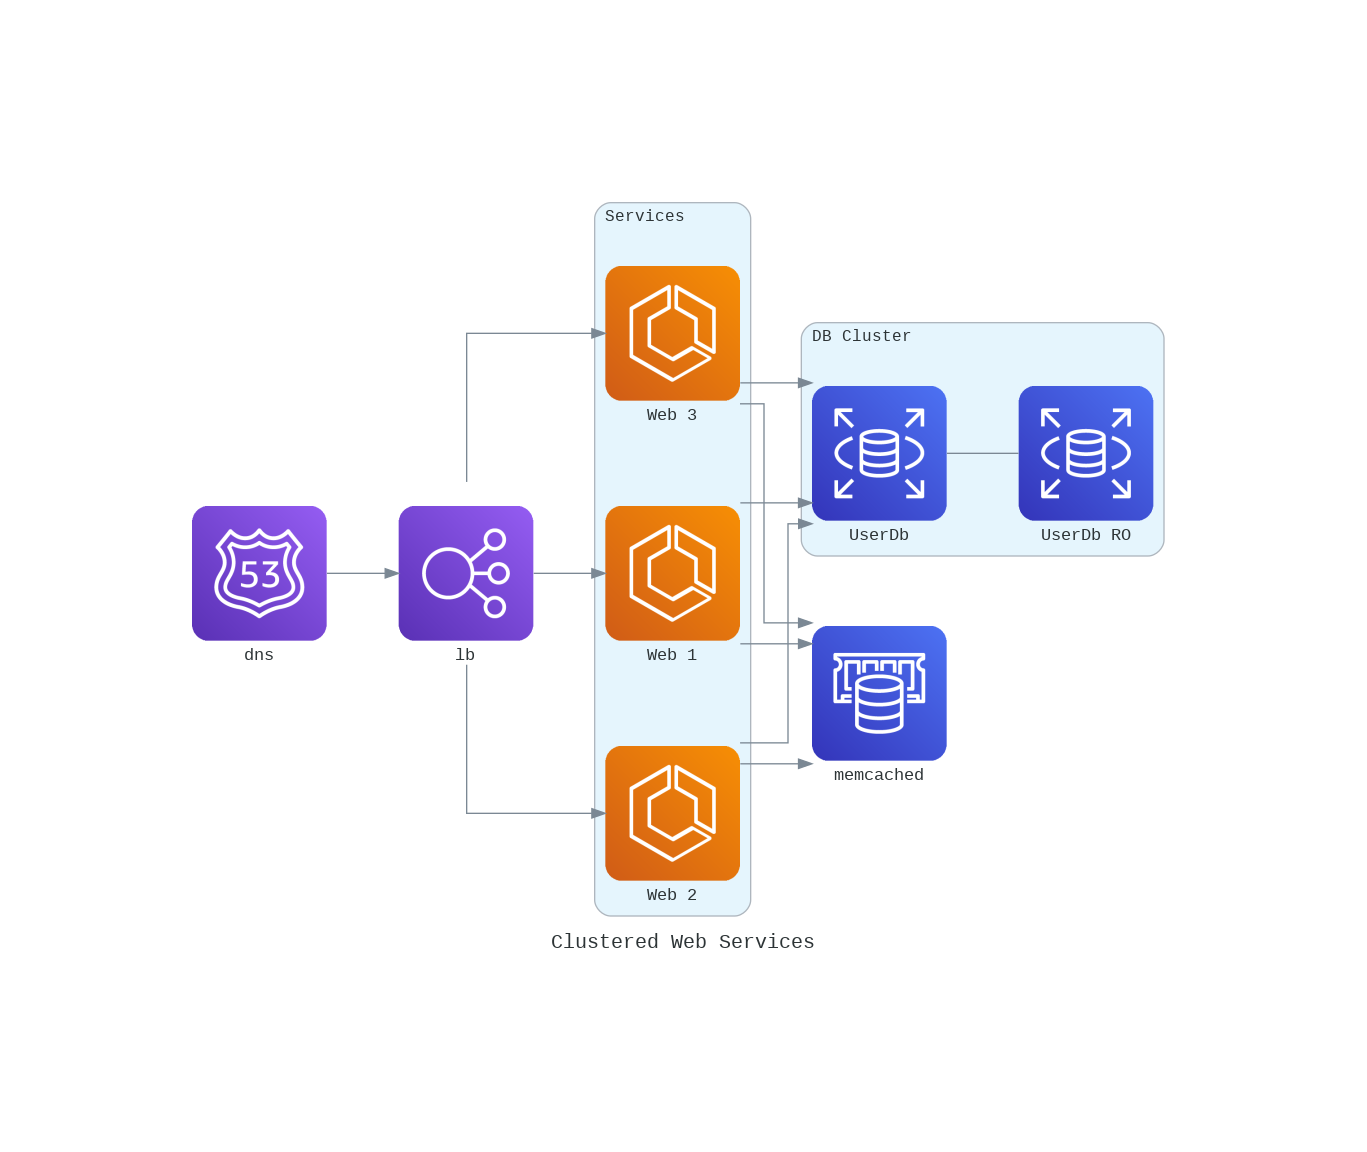

In [11]:
with Diagram("Clustered Web Services", show=True) as Diag:
  dns = Route53("dns")
  lb = ELB("lb")

  with Cluster("Services"):
    svg_group = [ECS("Web 1"),
                 ECS("Web 2"),
                 ECS("Web 3")]

  with Cluster("DB Cluster"):
    db_master = RDS("UserDb")
    db_master - [RDS("UserDb RO")]

  memcached = ElastiCache("memcached")

  dns >> lb >> svg_group
  svg_group >> db_master
  svg_group >> memcached

Diag

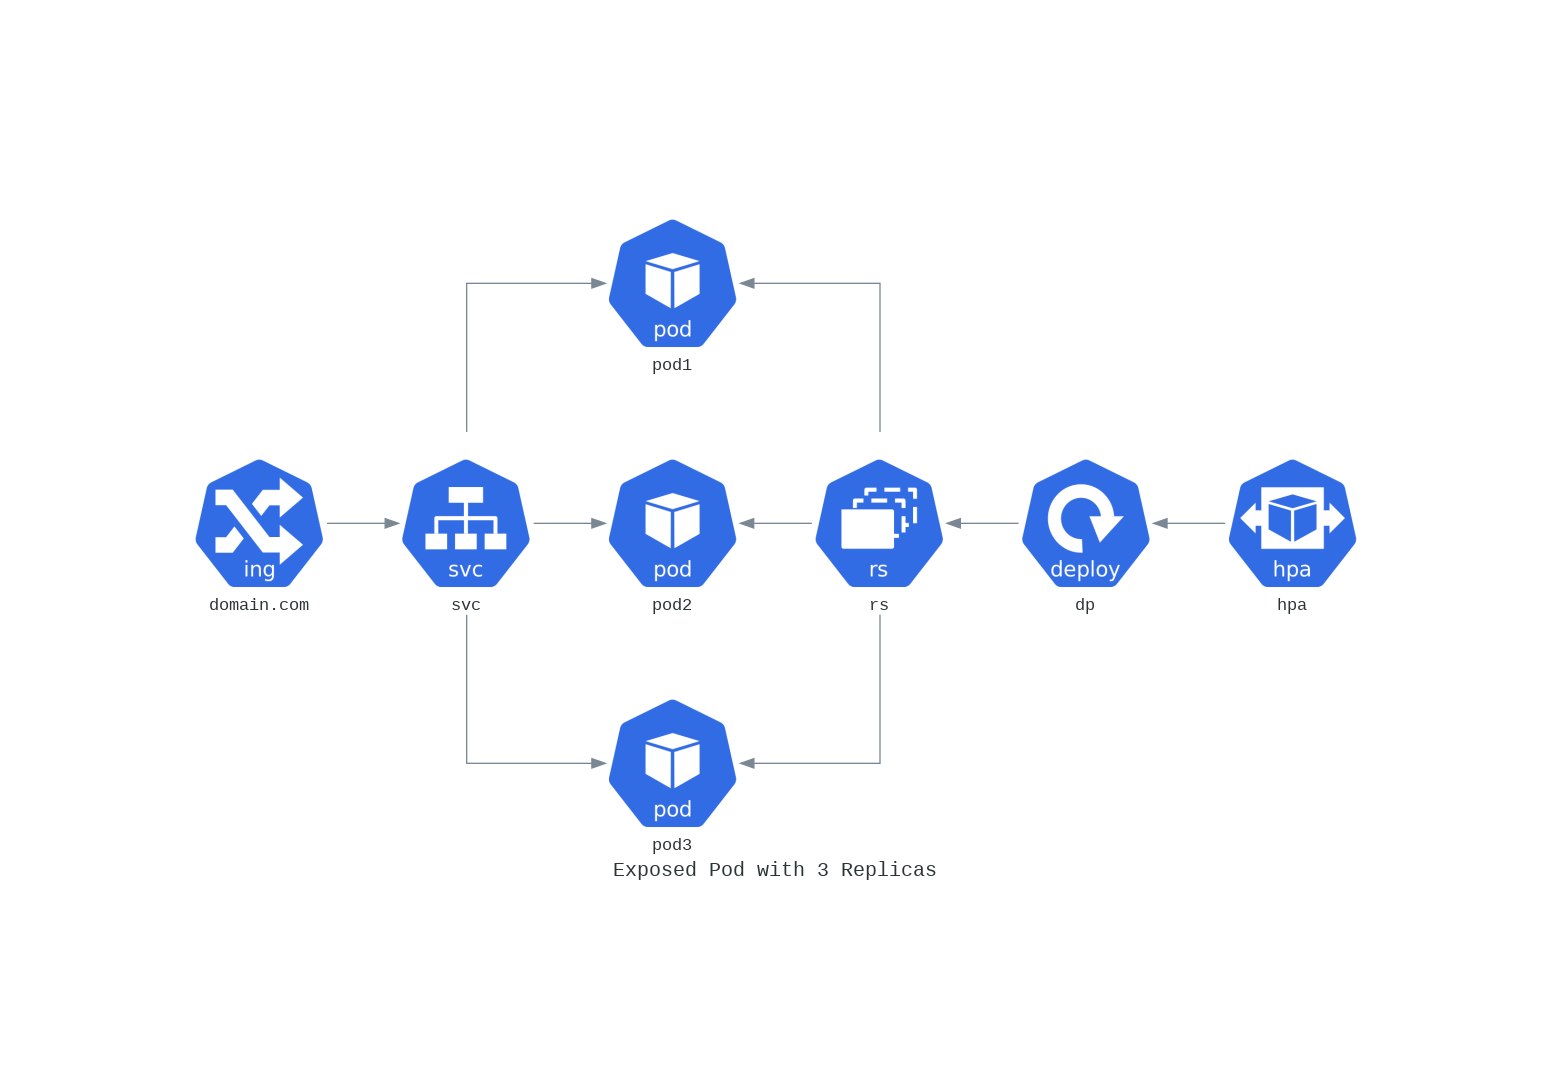

In [12]:
from diagrams import Diagram
from diagrams.k8s.clusterconfig import HPA
from diagrams.k8s.compute import Deployment, Pod, ReplicaSet
from diagrams.k8s.network import Ingress, Service

with Diagram("Exposed Pod with 3 Replicas", show=False) as Diag:
    net = Ingress("domain.com") >> Service("svc")
    net >> [Pod("pod1"),
            Pod("pod2"),
            Pod("pod3")] << ReplicaSet("rs") << Deployment("dp") << HPA("hpa")

Diag

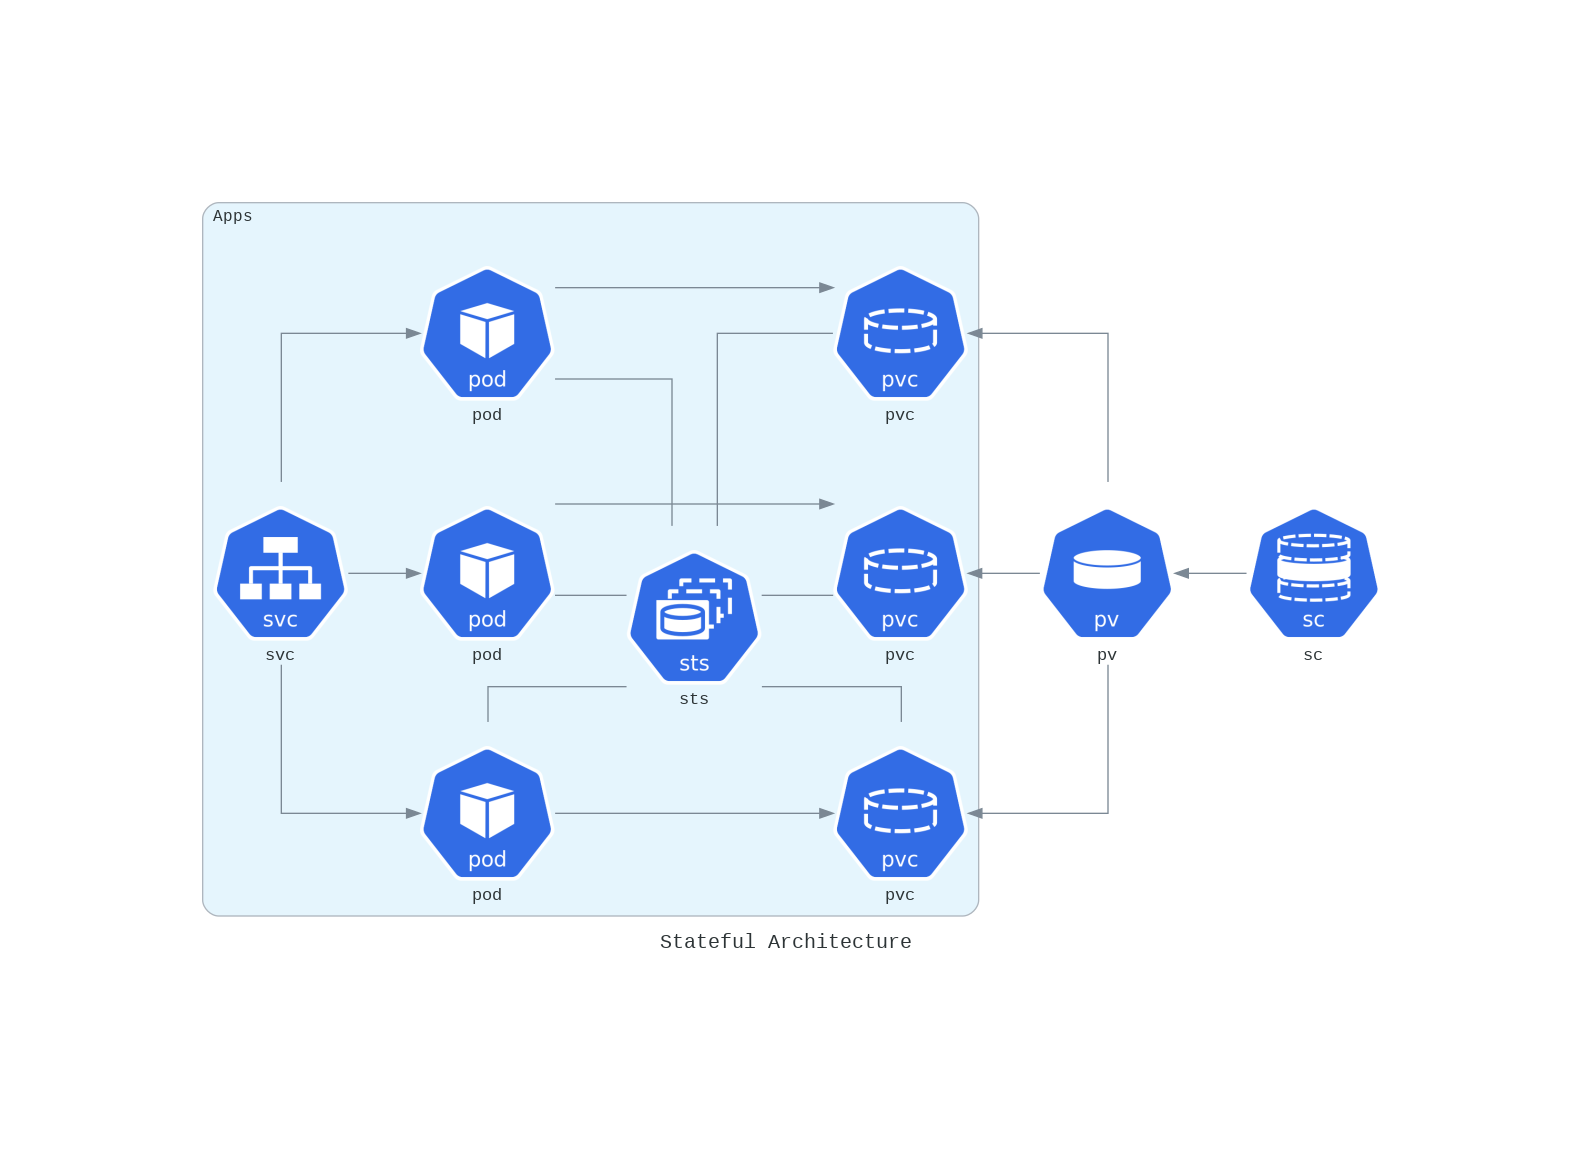

In [13]:
from diagrams import Cluster, Diagram
from diagrams.k8s.compute import Pod, StatefulSet
from diagrams.k8s.network import Service
from diagrams.k8s.storage import PV, PVC, StorageClass

with Diagram("Stateful Architecture", show=False) as Diag:
    with Cluster("Apps"):
        svc = Service("svc")
        sts = StatefulSet("sts")

        apps = []
        for _ in range(3):
            pod = Pod("pod")
            pvc = PVC("pvc")
            pod - sts - pvc
            apps.append(svc >> pod >> pvc)

    apps << PV("pv") << StorageClass("sc")

Diag

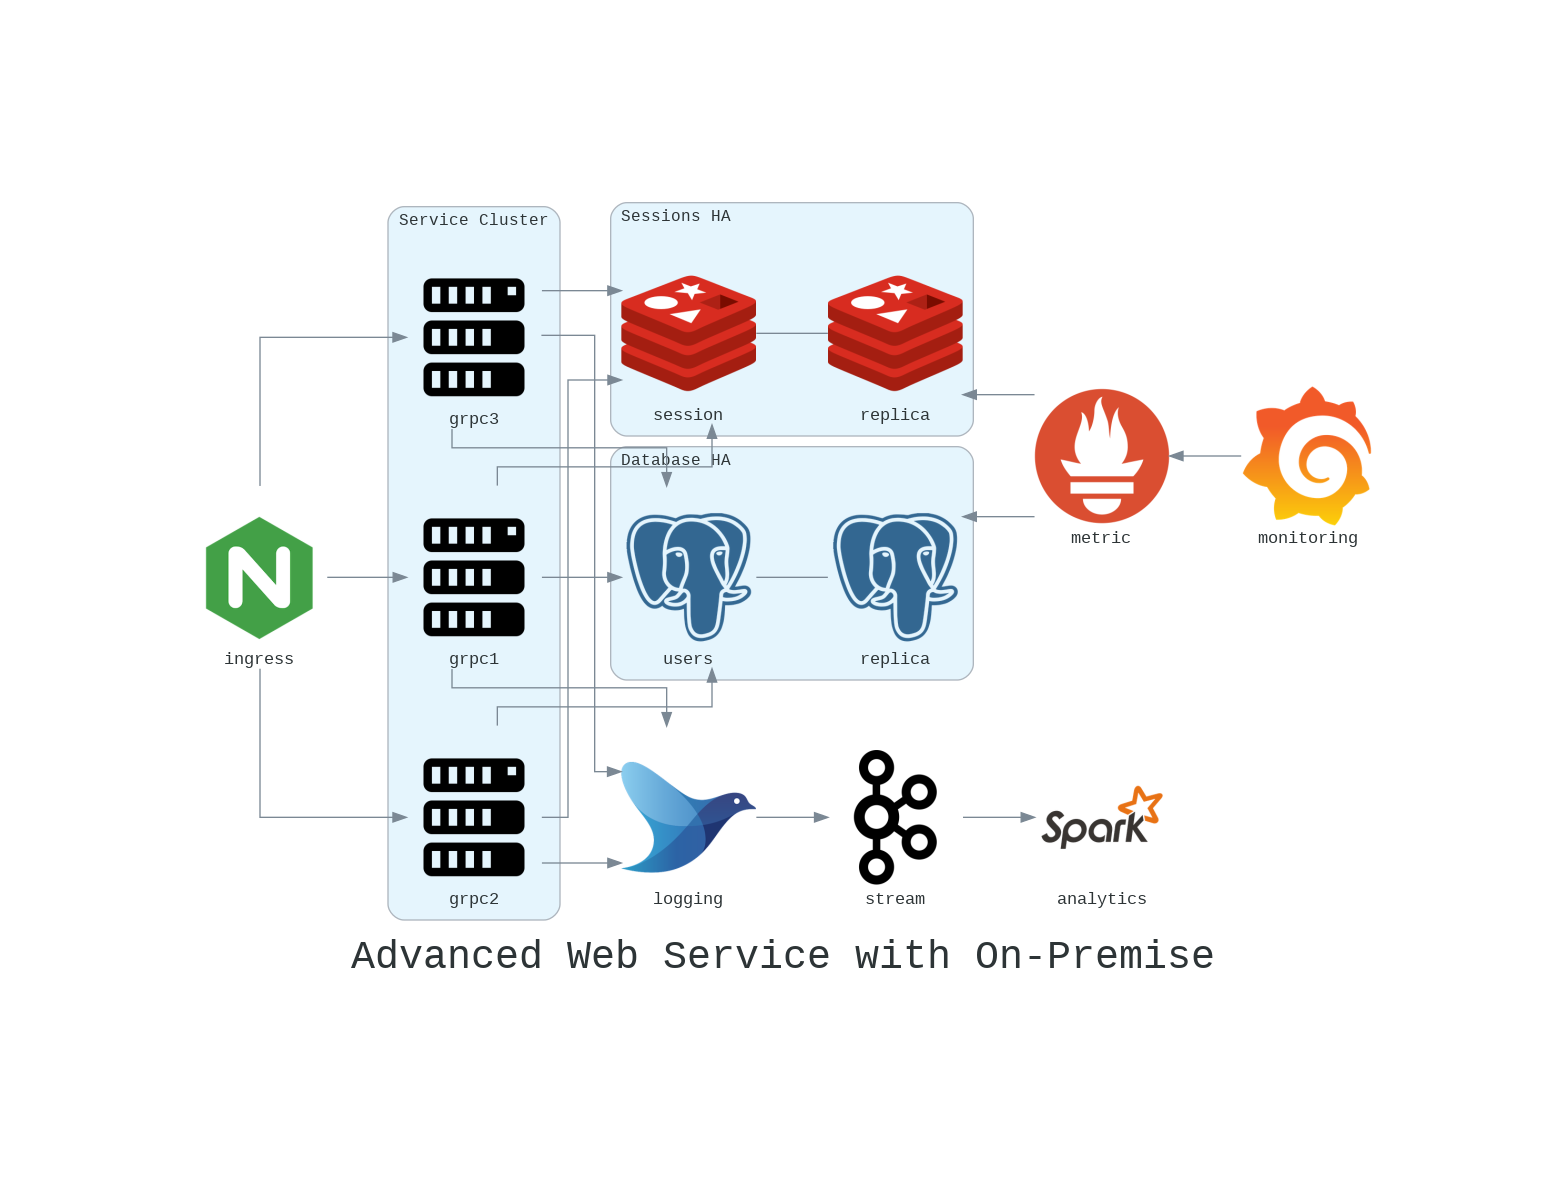

In [21]:
from diagrams import Cluster, Diagram
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

graph_attr = {
    "fontsize": "30",
    "bgcolor": "transparent"
}

with Diagram("Advanced Web Service with On-Premise", show=False, graph_attr=graph_attr) as Diag:
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary - Redis("replica") << metrics
        grpcsvc >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary - PostgreSQL("replica") << metrics
        grpcsvc >> primary

    aggregator = Fluentd("logging")
    aggregator >> Kafka("stream") >> Spark("analytics")

    ingress >> grpcsvc >> aggregator

Diag

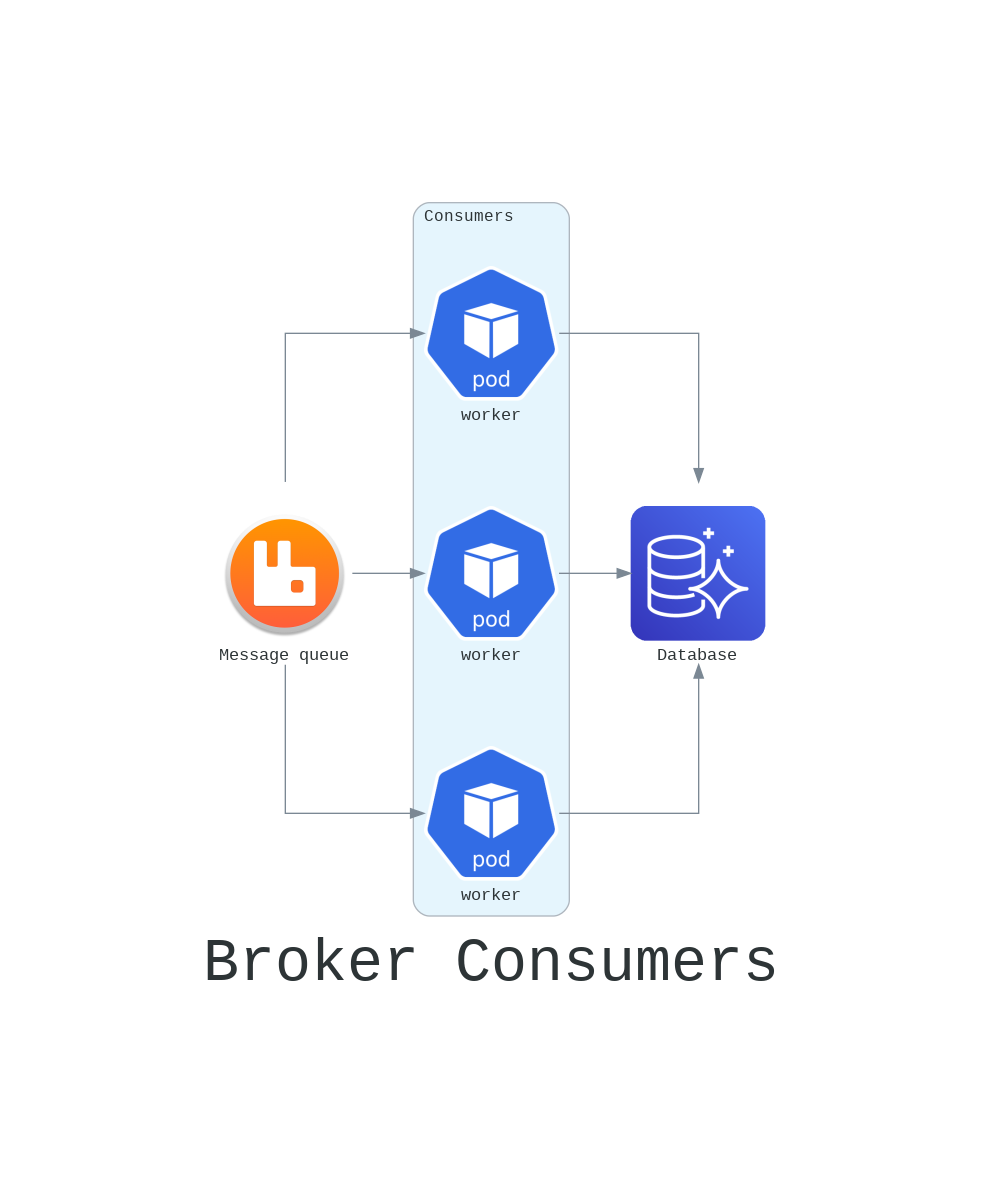

In [16]:
from urllib.request import urlretrieve

from diagrams import Cluster, Diagram
from diagrams.aws.database import Aurora
from diagrams.custom import Custom
from diagrams.k8s.compute import Pod

graph_attr = {
    "fontsize": "45",
    "bgcolor": "transparent"
}

# Download an image to be used into a Custom Node class
rabbitmq_url = "https://jpadilla.github.io/rabbitmqapp/assets/img/icon.png"
rabbitmq_icon = "rabbitmq.png"
urlretrieve(rabbitmq_url, rabbitmq_icon)

with Diagram("Broker Consumers", show=False, graph_attr=graph_attr) as Diag:
    with Cluster("Consumers"):
        consumers = [
            Pod("worker"),
            Pod("worker"),
            Pod("worker")]

    queue = Custom("Message queue", rabbitmq_icon)

    queue >> consumers >> Aurora("Database")

Diag

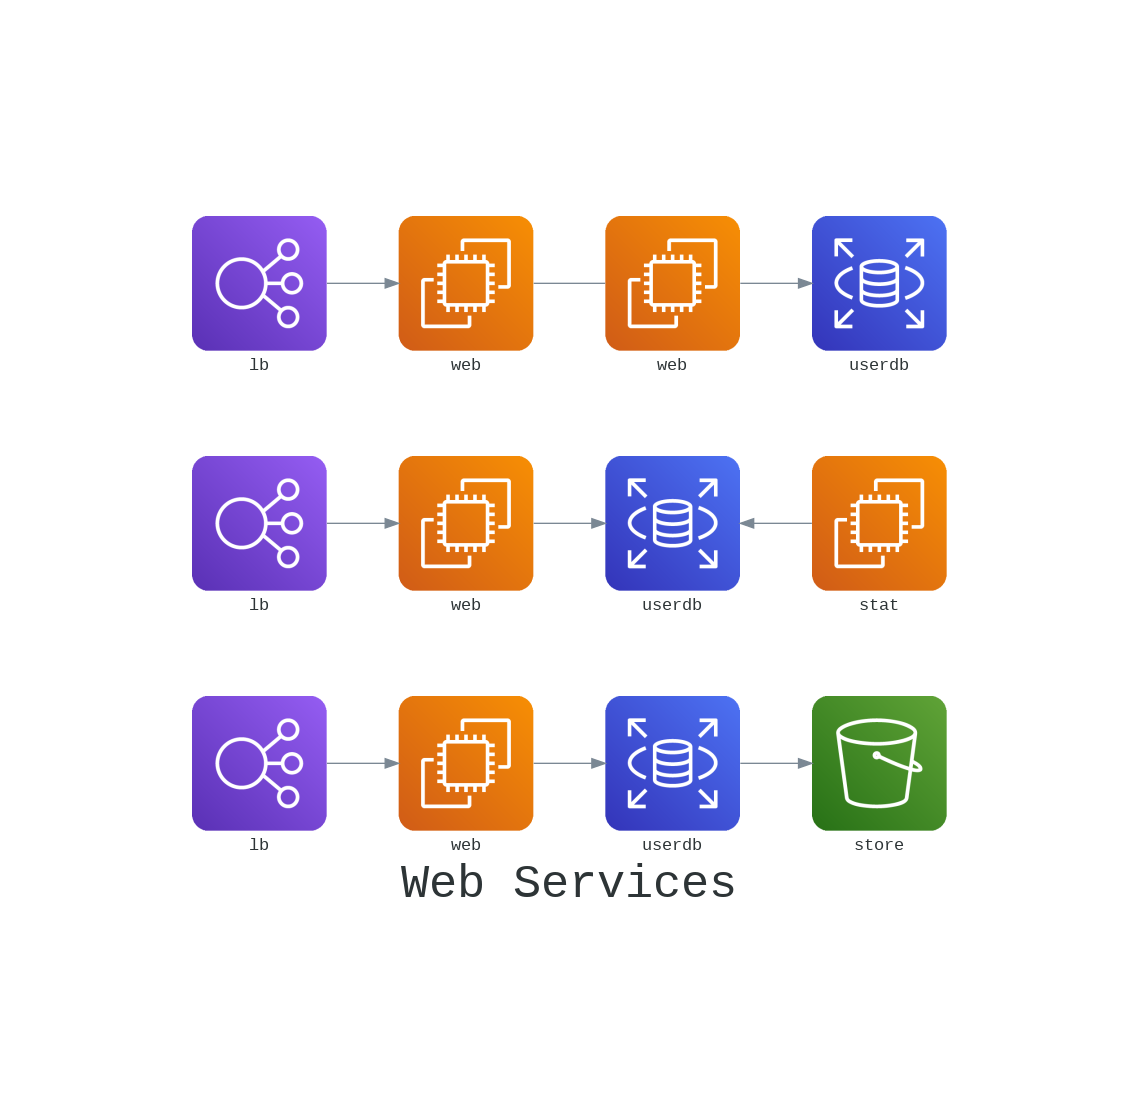

In [26]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.storage import S3

graph_attr = {
    "fontsize": "35",
    "bgcolor": "transparent"
}

with Diagram("Web Services", show=False, graph_attr=graph_attr) as Diag:
    ELB("lb") >> EC2("web") >> RDS("userdb") >> S3("store")
    ELB("lb") >> EC2("web") >> RDS("userdb") << EC2("stat")
    (ELB("lb") >> EC2("web")) - EC2("web") >> RDS("userdb")

Diag

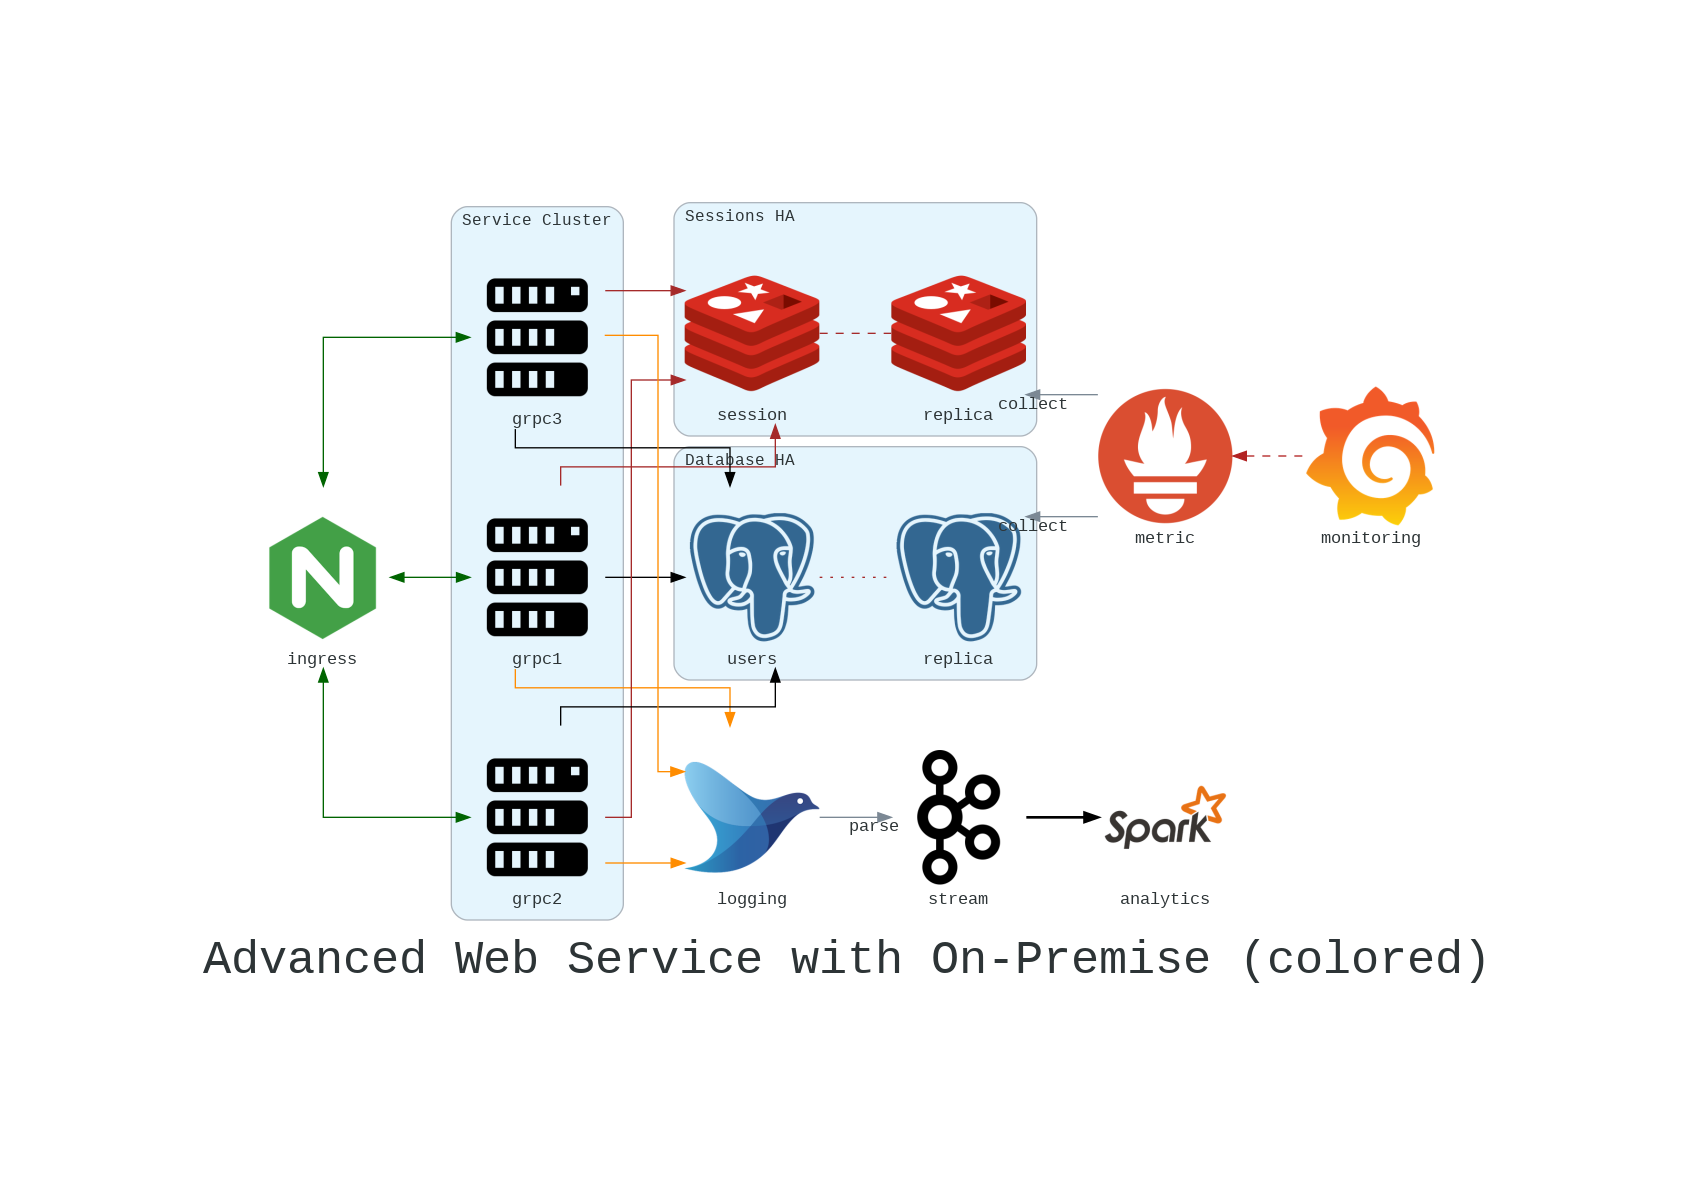

In [30]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka


graph_attr = {
    "fontsize": "35",
    "bgcolor": "transparent"
}


with Diagram(name="Advanced Web Service with On-Premise (colored)", show=False, graph_attr=graph_attr) as Diag:
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary \
            - Edge(color="brown", style="dashed") \
            - Redis("replica") \
            << Edge(xlabel="collect") \
            << metrics
        grpcsvc >> Edge(color="brown") >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary \
            - Edge(color="brown", style="dotted") \
            - PostgreSQL("replica") \
            << Edge(xlabel="collect") \
            << metrics
        grpcsvc >> Edge(color="black") >> primary

    aggregator = Fluentd("logging")
    aggregator \
        >> Edge(xlabel="parse") \
        >> Kafka("stream") \
        >> Edge(color="black", style="bold") \
        >> Spark("analytics")

    ingress \
        >> Edge(color="darkgreen") \
        << grpcsvc \
        >> Edge(color="darkorange") \
        >> aggregator

Diag

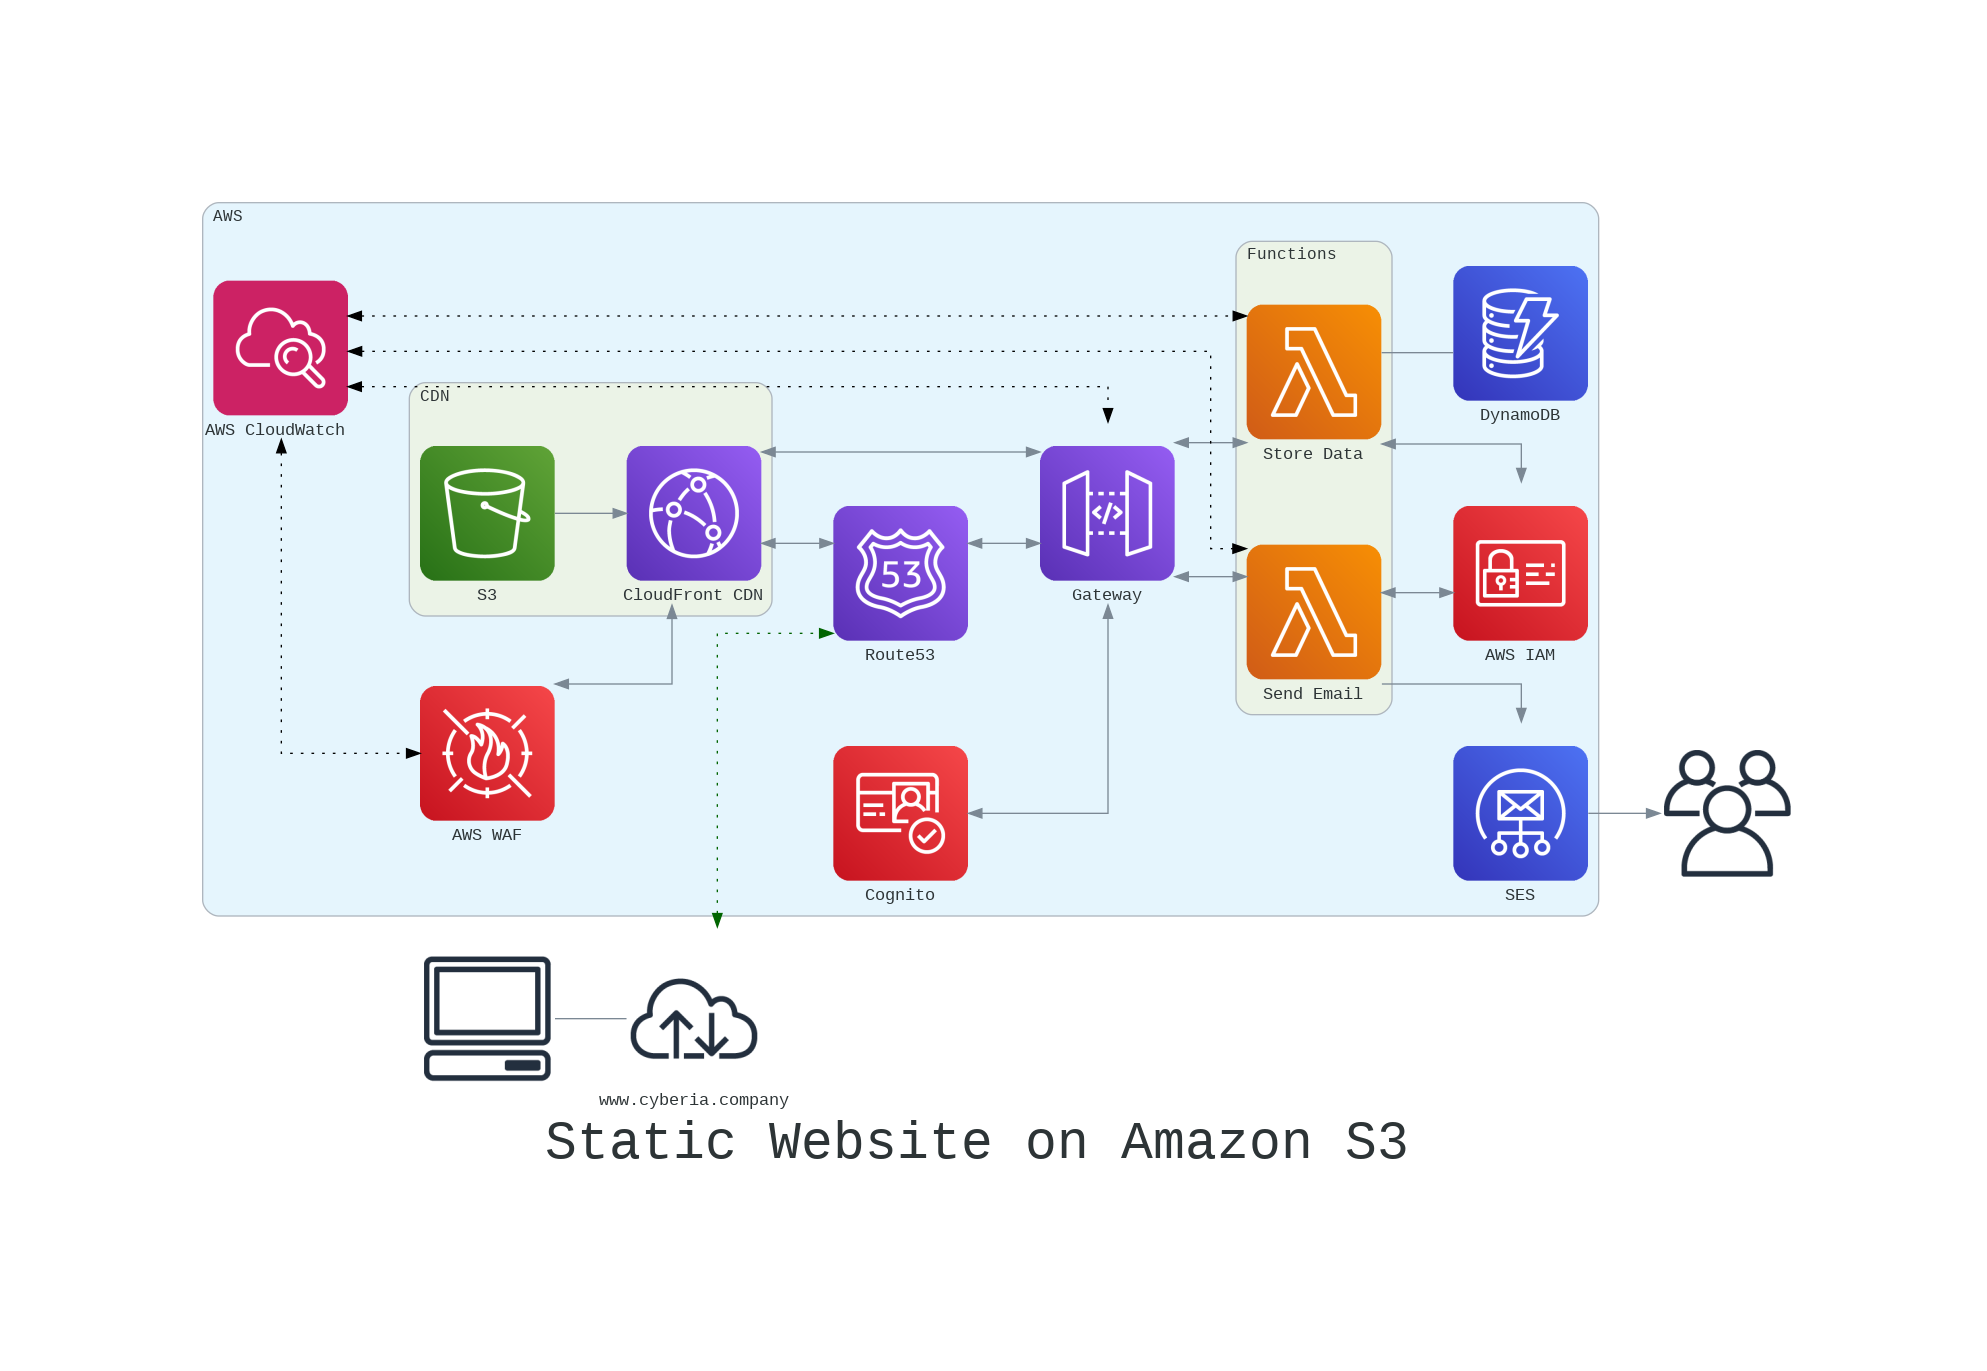

In [33]:
from diagrams import Diagram, Cluster, Edge

from diagrams.onprem.client import Client, Users
from diagrams.onprem.network import Internet
from diagrams.aws.compute import Lambda
from diagrams.aws.network import Route53, APIGateway, CF
from diagrams.aws.security import Cognito, IAM, WAF
from diagrams.aws.storage import S3
from diagrams.aws.engagement import SES
from diagrams.aws.database import DDB
from diagrams.aws.management import Cloudwatch

graph_attr = {
    "fontsize": "40"
}

with Diagram("Static Website on Amazon S3 ",
             filename="diagram", show=False, graph_attr=graph_attr) as Diag:

    users = Users()

    with Cluster("AWS"):

        security = Cognito("Cognito")
        gateway = APIGateway("Gateway")
        route = Route53("Route53")
        db = DDB("DynamoDB")
        email_service = SES("SES")
        monitoring = Cloudwatch("AWS CloudWatch ")
        firewall = WAF("AWS WAF")
        identity = IAM("AWS IAM")

        with Cluster("CDN"):
            cdn = S3("S3") >> CF("CloudFront CDN")

        with Cluster("Functions") as xyz:
            func_send_mail = Lambda("Send Email")
            func_store_data = Lambda("Store Data")
            functions = [func_send_mail, func_store_data]
            gateway >> Edge() << functions

        functions >> Edge() << identity

        func_send_mail >> Edge() >> email_service >> users
        func_store_data - Edge() - db
        cdn >> Edge() << route

        # Monitoring
        log_connection = Edge(color="darkpink", style="dotted")
        monitoring >> log_connection << gateway
        monitoring >> log_connection << [func_send_mail, func_store_data]
        monitoring >> log_connection << firewall

        firewall >> Edge() << cdn >> Edge() << gateway
        security >> Edge() << gateway

    Client() - \
        Internet("www.cyberia.company") >> \
        Edge(color="darkgreen", style="dotted") << \
        route >> Edge() << gateway

Diag